In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# taking two "training data" arrays
x = np.array([1, 2, 3, 4, 5])
y = np.array([1, 40, 90, 160, 250])

# Now I'm simply gonna try to see what is the value of y at x = 6

In [3]:
x

array([1, 2, 3, 4, 5])

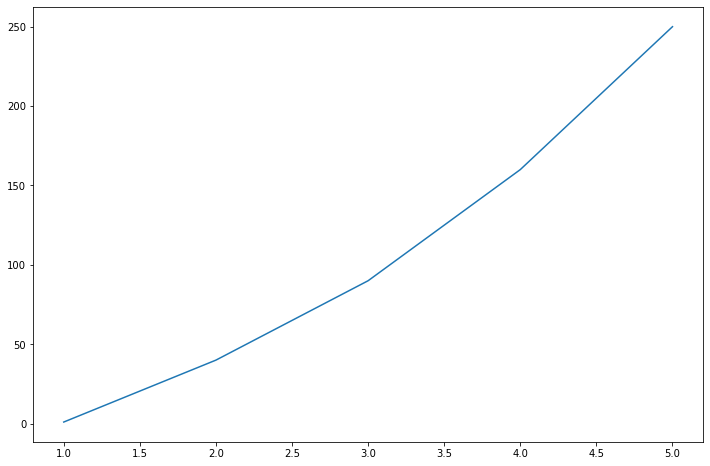

In [4]:
plt.figure(figsize=(12, 8))

plt.plot(x, y)

In [5]:
# now we need to find sigma(x), sigma(y), sigma(x^2), sigma(x^3), sigma(x^4), sigma(x*y) and sigma((x^2) * y)
# so that we can substitute and solve the equation in three variables, and finally substitute in 
# y = a + b*x + c*x^2

In [6]:
sx = np.sum(x)
sy = np.sum(y)
sx2 = np.sum(x**2)
sx3 = np.sum(x**3)
sx4 = np.sum(x**4)
sxy = np.sum(x*y)
sx2y = np.sum((x**2)*y)

In [7]:
# now i have to set up the equations

In [8]:
b = np.array([sy, sxy, sx2y])
a = np.array([[len(x), sx, sx2], [sx, sx2, sx3], [sx2, sx3, sx4]])

In [9]:
a

array([[  5,  15,  55],
       [ 15,  55, 225],
       [ 55, 225, 979]])

In [10]:
b

array([ 541, 2241, 9781])

In [11]:
roots = np.linalg.solve(a, b)

In [12]:
def predict(x_new):
    x_sq = x_new**2
    pred = roots[0] + roots[1]*x_new + roots[2]*x_sq
    # print(f'pred: {pred}')
    return pred

In [13]:
predict(6.0)

354.5999999999998

In [14]:
# the expected answer was 360, since it y was was just the mapping of x to the square times 10. considering the implementation, this seems pretty accurate

In [19]:
x_plot = np.array(range(11))

y_plot = []

for i in range(len(x_plot)):
    x_sq = x_plot[i]**2
    y_plot.append(roots[0] + roots[1]*x_plot[i] + roots[2]*x_sq)

In [20]:
y_plot[6]

354.5999999999998

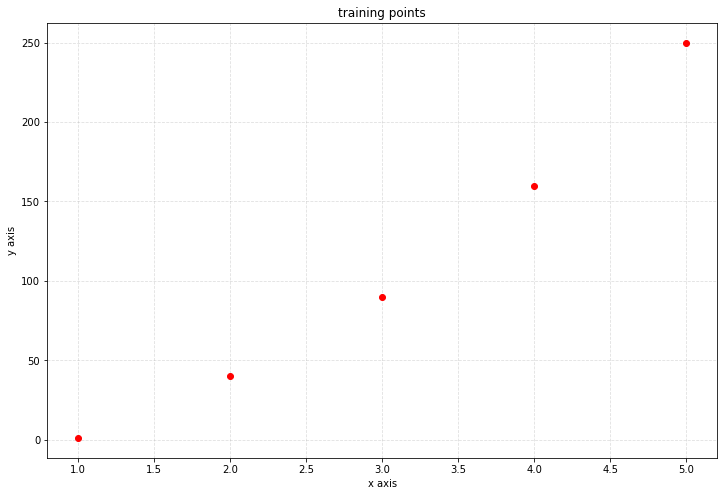

In [21]:
plt.figure(figsize=(12, 8))

plt.plot(x, y, 'ro')
plt.title('training points')

plt.xlabel('x axis')
plt.ylabel('y axis')

plt.grid(alpha=.4,linestyle='--')
plt.show()

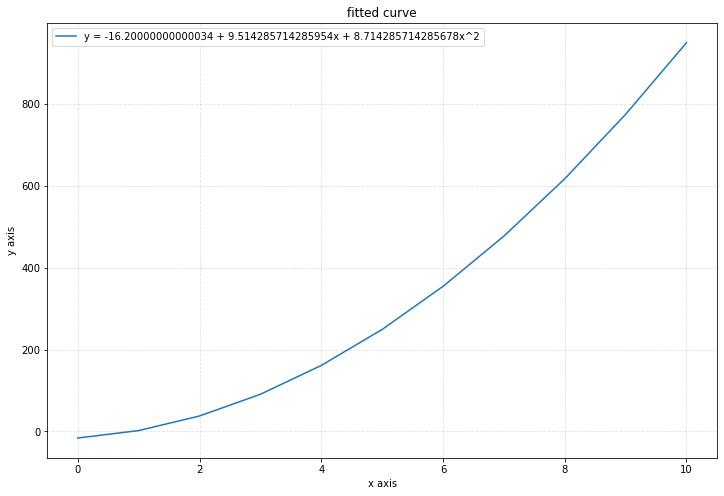

In [24]:
plt.figure(figsize=(12, 8))

plt.plot(x_plot,y_plot,label=f'y = {roots[0]} + {roots[1]}x + {roots[2]}x^2')

plt.title('fitted curve')

plt.xlabel('x axis')
plt.ylabel('y axis')

plt.grid(alpha=.4,linestyle='--')

plt.legend()
plt.show()